In [12]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import utils

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_predict, cross_val_score

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

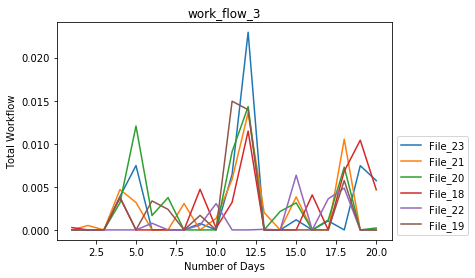

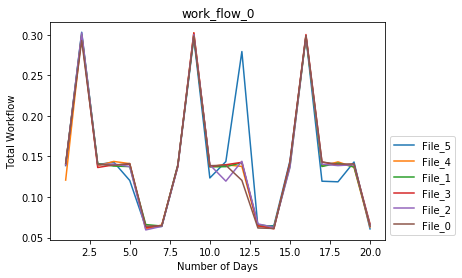

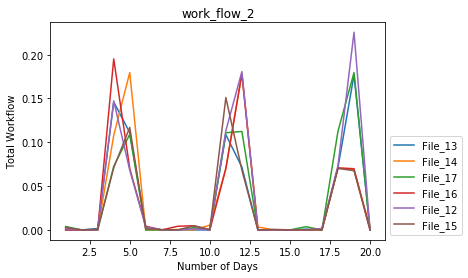

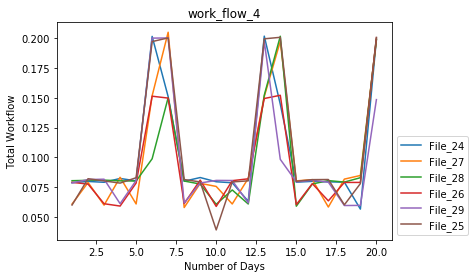

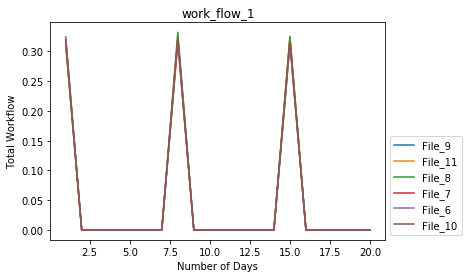

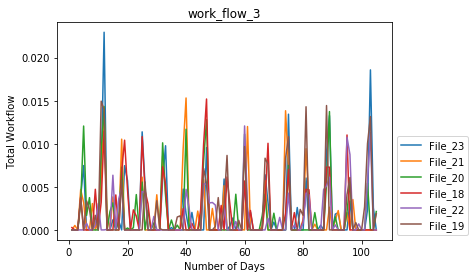

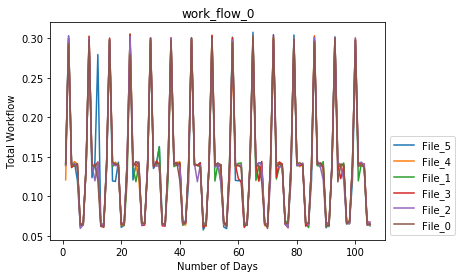

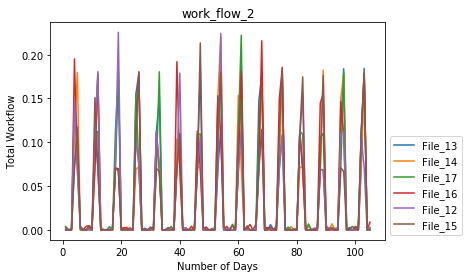

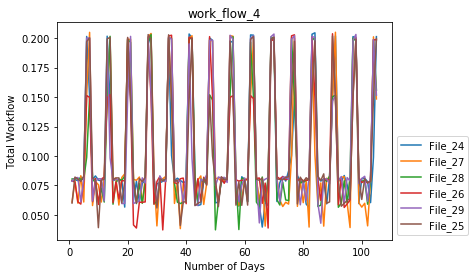

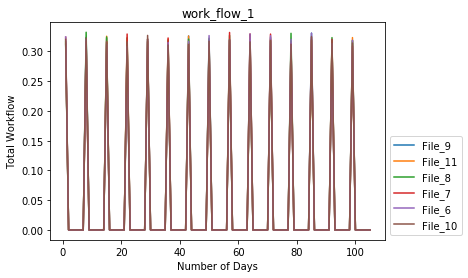

In [9]:
#problem 1
path = 'network_backup_dataset.csv'
raw_data = pd.read_csv(path)
work_flow = set(raw_data.values[:,3])

def ini_workflow(file_list):
    cur = dict([])
    for f in work_flow:
        cur[f] = 0.0
    return cur

def print_backup(days, work_flow, data):    
    day_list = set([])
    file_list = set([item[4] for item in data if item[3] == work_flow])
    backup = []
    cur = ini_workflow(file_list)
    for item in data:
        dayabbre = str(item[0]) + item[1]
        if dayabbre not in day_list:
            if len(day_list) < days:
                backup.append(cur)
                cur = ini_workflow(file_list)
                day_list.add(dayabbre)
            else:
                break
        (backup[-1])[item[4]] = item[5]
        
    for f in file_list:
        l = []
        for d in range(days):
            l.append((backup[d])[f])
        plt.plot(range(1, days + 1), l, label = f)
        
    plt.xlabel('Number of Days')
    plt.ylabel('Total Workflow')
    plt.title(work_flow)
    plt.legend(bbox_to_anchor=(1,0), loc = 3)
    plt.show()

for workflow in work_flow:
    print_backup(20, workflow, raw_data.values)
for workflow in work_flow:
    print_backup(105, workflow, raw_data.values)

#there are very obvious repeating patterns for each work-flow.

In [15]:
#problem2
#convert categorical features and do the preprocessing
def scalar_encoding(data):
    rows = data.shape[0]
    data1 = data
    for i in range(data.shape[1]):
        if type(data[0,i]) == str:
            types = set(data[:,i])
            k = 1
            for t in types:
                for j in range(rows):
                    if data[j, i] == t:
                        data1[j, i] = k
                k = k + 1
    return data1


data = np.array(scalar_encoding(raw_data.values[:, 0:6]), dtype = 'float64')
scaler = StandardScaler()
#only std the first 5 cols
data_std = copy.deepcopy(data)
data_std[:,0:5] = scaler.fit_transform(data_std[:,0:5])
print(data_std)

[[-1.62003968 -1.00410343 -1.455772   -0.69876446  1.67632586  0.        ]
 [-1.62003968 -1.00410343 -1.455772    0.0101834   0.98275612  0.        ]
 [-1.62003968 -1.00410343 -1.455772    0.0101834  -0.75116821  0.        ]
 ...
 [ 1.62051288  0.98707111  1.47082378  0.71913126  0.86716117  0.19857244]
 [ 1.62051288  0.98707111  1.47082378  0.71913126  0.17359143  0.19957007]
 [ 1.62051288  0.98707111  1.47082378  0.71913126 -0.63557325  0.20120052]]


In [27]:
#def cross_valid(x_data, y_data, f, p):
#    y_predicted = cross_val_predict(f, x_data, y_data, cv=10)
#    print(np.sqrt(metrics.mean_squared_error(y_data, y_predicted)))
#    cv_scores = cross_val_score(f, x_data, y_data, cv=10, scoring='neg_mean_squared_error')
#    print ((sum(cv_scores)/-10.0)**0.5)
#cross_valid(data[:,0:5], data[:,5], LinearRegression(),1) 

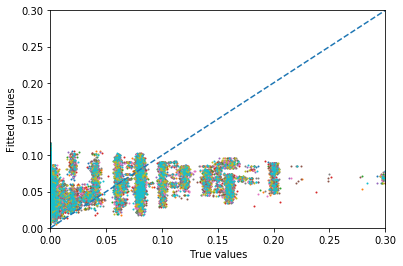

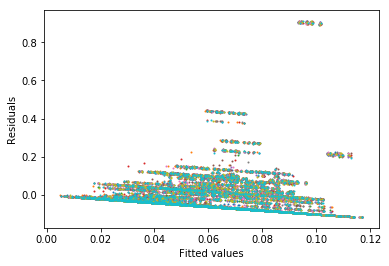

[0.10186891788225691, 0.10189609892199583]


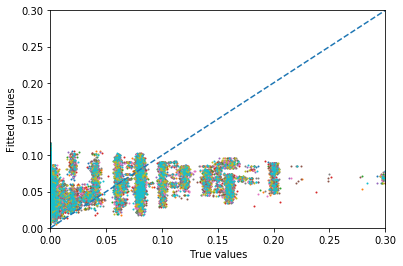

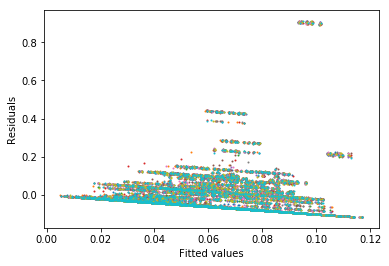

[0.10186891788225691, 0.10189609892199583]


In [30]:
#do the cross validation
#f: the function, p: whether print the plot
def cross_valid(x_data, y_data, f, p):
    
    kf = KFold(n_splits=10)
    kf.get_n_splits(x_data)    
    rmse = []
    rmse_train = []
    
    for train_idx, test_idx in kf.split(x_data):
        regr = f.fit(x_data[train_idx], y_data[train_idx])
        #the test prediction
        pred = regr.predict(x_data[test_idx])
        rmse.append(np.sqrt(metrics.mean_squared_error(y_data[test_idx], pred)))
        #the train prediction
        pred_train = regr.predict(x_data[train_idx])        
        rmse_train.append(np.sqrt(metrics.mean_squared_error(y_data[train_idx], pred_train)))
        
        #if need to plot the figure
        if p == 1:
            plt.figure(1)
            plt.scatter(y_data[test_idx], pred, s =1)
            plt.figure(2)
            plt.scatter(pred, y_data[test_idx] - pred, s = 1)
    
    if p == 1:
        plt.figure(1)
        plt.plot([0,0.3],[0,0.3],  linestyle='dashed')
        plt.xlim(0,0.3)
        plt.ylim(0,0.3)       
        plt.xlabel('True values')
        plt.ylabel('Fitted values')
        plt.figure(2)
        plt.xlabel('Fitted values')
        plt.ylabel('Residuals')
        plt.show()
    
    return [np.mean(np.array(rmse)), np.mean(np.array(rmse_train))]     

rmse1 = cross_valid(data[:,0:5], data[:,5], LinearRegression(),1)
print(rmse1)
rmse2 = cross_valid(data_std[:,0:5], data_std[:,5], LinearRegression(),1)
print(rmse2)

#test train (without std)
#[0.09556263771925569, 0.09563690020689064]
#test train (with std)
#[0.09556263771925567, 0.09563690020689064]
#seems that there is not much difference after standardizing 
    

[8.45006257e-03 1.13402972e+02 1.50740934e+02 5.46772146e+02
 1.68122255e+01]
[0.00090098 0.23479962 0.29973489 0.77341675 0.77011243]


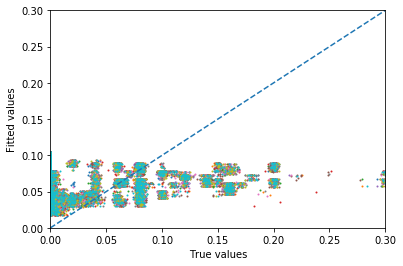

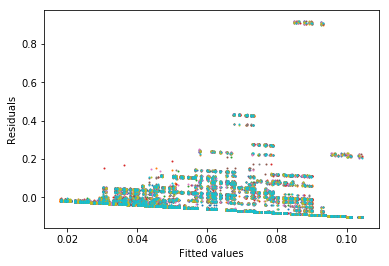

[0.10219687419187429, 0.1022331563189212]


In [31]:
f_regr = f_regression(data[:,0:5], data[:,5])
print(f_regr[0])
m_regr = mutual_info_regression(data[:,0:5], data[:,5])
print(m_regr)
#We did the regression without standardizing.
#the three most important variables selected by f-regrssion and mutual info regression is hour-of-day, work-flow-id, file-name
#they are of index 2,3,4
rmse3 = cross_valid(data[:,[2,3,4]], data[:,5], LinearRegression(), 1)
print(rmse3)
#test train
#[0.09565782483134083, 0.09575947213880658]
#actually the performance becomes worse


In [45]:
#iterate through 32 possible combinations of scalar and one-hot encoding
def select32(data, cand, cur, reslist, res, rescoef, func):
    if cur == 5:
        enc_data = data[:,0:5]
        if len(cand) != 0:
            enc = OneHotEncoder(categorical_features = cand)
            enc_data = enc.fit_transform(data[:,0:5]).toarray()
        func.fit(enc_data, data[:,5])
        res.append(cross_valid(enc_data, data[:,5], func, 0))
        reslist.append(cand)
        rescoef.append(func.coef_)
        return
    cand1 = copy.deepcopy(cand)
    cand1.append(cur)
    select32(data, cand, cur + 1, reslist, res, rescoef, func)
    select32(data, cand1, cur + 1, reslist, res, rescoef, func)
reslist = []
res = []
rescoef = []
select32(data, [], 0, reslist, res, rescoef, LinearRegression())

[1, 2, 4]		[0.08837146 0.08834991]
[1, 2, 3]		[0.08837888 0.08833992]
[1, 2, 3, 4]		[0.08840019 0.08834972]
[2, 3]		[0.08972294 0.08970896]
[2, 4]		[0.0897267  0.08972329]
[2, 3, 4]		[0.08973426 0.08972235]
[1, 4]		[0.08976856 0.08975438]
[1, 3]		[0.08978447 0.08975528]
[1, 3, 4]		[0.0898022  0.08976691]
[3, 4]		[0.09109731 0.09110471]
[3]		[0.09109866 0.09110143]
[4]		[0.0911013 0.0911003]
[1, 2]		[0.09938576 0.09939121]
[1]		[0.10060608 0.10062639]
[2]		[0.10066464 0.1006791 ]
[]		[0.10186892 0.1018961 ]
[0]		[1.81083422e+09 1.01894254e-01]
[0, 2]		[1.94598922e+09 1.00676107e-01]
[0, 3]		[2.19132509e+09 9.11010328e-02]
[0, 2, 3]		[2.57640782e+09 8.97307775e-02]
[0, 1]		[2.65487648e+09 1.00626827e-01]
[0, 1, 2, 3]		[5.10519509e+09 8.83530951e-02]
[0, 1, 3]		[5.91690716e+09 8.97683705e-02]
[0, 1, 4]		[7.37561844e+09 8.97655422e-02]
[0, 4]		[1.26346732e+10 9.11438318e-02]
[0, 3, 4]		[1.47822257e+10 9.11222806e-02]
[0, 1, 3, 4]		[2.05617551e+10 8.98427166e-02]
[0, 2, 3, 4]		[2.25870437e+

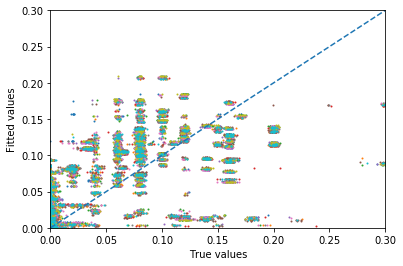

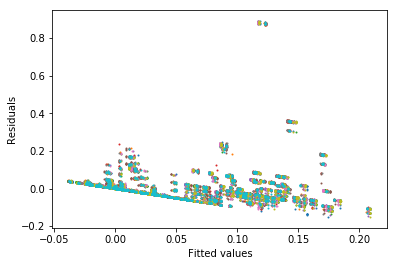

[0.08837887581748155, 0.08833991555080048]

In [48]:
res = np.array(res)
for i in range(32):
    line = np.argsort(res[:,0])[i]
    print(str(reslist[line]) + '\t\t' + str(res[line,:]))
 #   print(rescoef[line])
    
#smallest RMSE should be [0.08837594795483109, 0.08833982454239486] test, train
#with dayofweek, hourofday, workflowid one-hot-encoded

#because the exact value of day of the week, hour of the day and work id has no meaning as far as the result is concerned
#What we care about is whether it is Friday / workflow1.. So one-hot-encoded might be more suitable
#We don't do one-hot-encoding for the file number variable may because too many parameters may cause overfit.
enc = OneHotEncoder(categorical_features = [1,2,3])
enc_data = enc.fit_transform(data[:,0:5])
cross_valid(enc_data.toarray(), data[:,5], LinearRegression(), 1)

#(a)(v)(i)
#From the results we can see that for some combinations, the test rmse becomes extremely high even though the training rmse might be lower
#That's because we chose to on-hot-encode the wrong feature(the number of week) and the model was overfitted.
#the coef of unregularized form can be as large as 10^10


In [51]:
#Ridge 
#firstly set alpha to be the default value and find out the optimal combination
reslist_ridge = []
res_ridge = []
rescoef_ridge = []
select32(data, [], 0, reslist_ridge, res_ridge,rescoef_ridge, Ridge())

res_ridge = np.array(res_ridge)
for i in range(32):
    line = np.argsort(res_ridge[:,0])[i]
    print(str(reslist_ridge[line]) + '\t\t' + str(res_ridge[line,:]))
 #   print(rescoef_ridge[line])
#the optimal combination should still be [1,2,3]
#the smallest RMSE is 0.88368
#the coeffients of regularized forms are much smaller then the unregularized. Most of them are in the range [10e-5, 10e-1]
#For all the combinations, the test rmse  won't be extremely high, 
# though the train rmse is relatively larger than the unregularized forms.

[1, 2, 3]		[0.08836779 0.0883358 ]
[1, 2, 3, 4]		[0.08836896 0.08833449]
[1, 2, 4]		[0.088369   0.08833453]
[0, 1, 2, 3]		[0.08924468 0.08833434]
[0, 1, 2, 3, 4]		[0.08924871 0.08833303]
[0, 1, 2, 4]		[0.089251   0.08833307]
[2, 3]		[0.08972487 0.08970756]
[2, 3, 4]		[0.08972605 0.08970627]
[2, 4]		[0.08972609 0.0897063 ]
[1, 3]		[0.08976598 0.08975303]
[1, 3, 4]		[0.08976713 0.08975174]
[1, 4]		[0.08976717 0.08975177]
[0, 1, 3]		[0.09035528 0.08975164]
[0, 1, 3, 4]		[0.09035916 0.08975035]
[0, 1, 4]		[0.09036106 0.08975038]
[0, 2, 3]		[0.09087279 0.08970552]
[0, 2, 3, 4]		[0.0908769  0.08970424]
[0, 2, 4]		[0.09087945 0.08970427]
[3]		[0.09109686 0.09110048]
[3, 4]		[0.09109799 0.0910992 ]
[4]		[0.09109804 0.09109924]
[0, 3]		[0.0919168  0.09109859]
[0, 3, 4]		[0.09192085 0.09109732]
[0, 4]		[0.09192304 0.09109736]
[1, 2]		[0.09938725 0.09938998]
[1]		[0.10060587 0.10062561]
[2]		[0.1006693  0.10067788]
[]		[0.10186892 0.1018961 ]
[0, 1, 2]		[0.10206513 0.099388  ]
[0, 1]		[0.10281807

[0.08836780982575003, 0.08836780964501562, 0.08836780785333524, 0.0883677915018973, 0.0883677835023983, 0.08838228131701506, 0.08934333367523835]


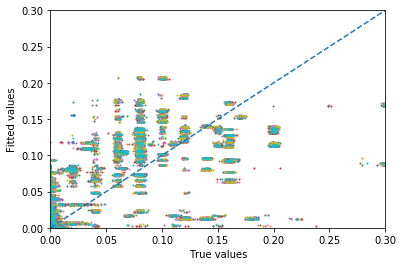

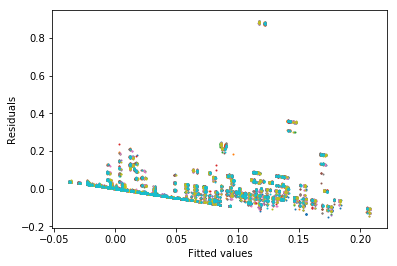

[0.0883677915018973, 0.08833579689760576]

In [66]:
#then try to sweep through the value of alpha with the use of combination above
#alpha = 1 and one-hot-encoding [1,2,3] reaches the smallest, the smallest test rmse =  0.08836760793627232
rmse_ridge = []
enc = OneHotEncoder(categorical_features = [1,2,3])
enc_data = enc.fit_transform(data[:,0:5]).toarray()
for i in np.linspace(-3,3,7):
    rmse_ridge.append(cross_valid(enc_data, data[:,5], Ridge(alpha = 10**i), 0)[0])
print(rmse_ridge)
cross_valid(enc_data, data[:,5], Ridge(alpha = 10**0), 1)


In [68]:
#LASSO
#firstly set alpha to be the default value and find out the optimal comb 
reslist_lasso = []
res_lasso = []
rescoef_lasso = []
select32(data, [], 0, reslist_lasso, res_lasso,rescoef_lasso, Lasso(alpha = 10**-4))

res_lasso = np.array(res_lasso)
for i in range(32):
    line = np.argsort(res_lasso[:,0])[i]
   # print(str(reslist_lasso[line]) + '\t\t' + str(res_lasso[line,:]))
  #  print(rescoef_lasso[line])
#If we use LASSO using the default value alpha = 1, it seems that the penalty for the coeffcients is so large that every coefficient 
# become 0.So we set alpha to be 10^(-4) at first. 
#Most coefficients of LASSO regression are still 0.


[0.08837259712422799, 0.08837157721631923, 0.08880331011579883, 0.10039512307680043, 0.1041399307167102]


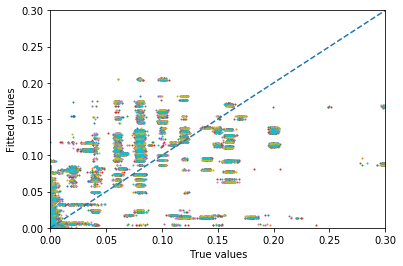

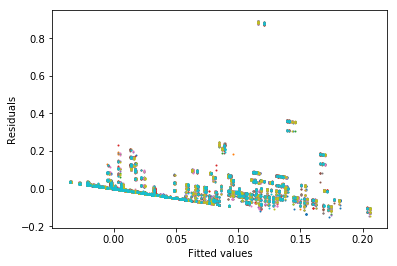

[0.08837157721631923, 0.08834126945154355]

In [67]:
rmse_lasso = []
enc = OneHotEncoder(categorical_features = [0,1,2,3,4])
enc_data = enc.fit_transform(data[:,0:5]).toarray()
for i in np.linspace(-5,-1,5):
    rmse_lasso.append(cross_valid(enc_data, data[:,5], Lasso(alpha = 10**i, max_iter = 10000), 0)[0])
print(rmse_lasso)
#the optimal combination should still be [0,1,2,3,4]
#the smallest test RMSE is 0.08837158
cross_valid(enc_data, data[:,5], Lasso(alpha = 10**-4), 1)